# Importing necessary things

In [1]:
import pandas as pd
import numpy as np
import sklearn

import sklearn.metrics as metrics
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.svm import SVC

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, RegexpTokenizer, TweetTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

import re
from datetime import datetime

import pickle

==================================================================================================================

In [2]:
from pathlib import Path

root = Path('.')

my_path1 = root / "tokens" / "processedreviewrating1.pbz2"
my_path2 = root / "tokens" / "processedreviewrating2.pbz2"
my_path3 = root / "tokens" / "processedreviewrating3.pbz2"
my_path4 = root / "tokens" / "processedreviewrating4.pbz2"
my_path5 = root / "tokens" / "processedreviewrating5.pbz2"

import bz2

def compressed_pickle(path, data):
    with bz2.BZ2File(path, 'w') as f:
        pickle.dump(data, f)

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data

In [3]:
rating1 = decompress_pickle(my_path1)
rating2 = decompress_pickle(my_path2)
rating3 = decompress_pickle(my_path3)
rating4 = decompress_pickle(my_path4)
rating5 = decompress_pickle(my_path5)

In [4]:
df = pd.concat([rating1, rating2, rating3, rating4, rating5])

In [5]:
# Remove common words
stopwords_list = stopwords.words('english') + list(string.punctuation)
# Remove more punctuation
stopwords_list += ["''", '""', '...', '``']

In [6]:
def process_reviews(reviews):
    tokens = nltk.word_tokenize(reviews)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed  

lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [7]:
df['wordlist'] = df['content'].apply(lambda x: process_reviews(x))
df['wordlistlem'] = df['wordlist'].apply(lemmatize_text)
df['strings'] = [' '.join(i) for i in df['wordlistlem']]

In [8]:
df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,appId,wordlist,wordlistlem,strings
0,stamina system ruined it for me. any game that...,1,5,1.2.4,com.gravity.romNAg,"[stamina, system, ruined, game, attempts, limi...","[stamen, system, ruined, game, attempt, limit,...",stamen system ruined game attempt limit playti...
3,I was a big fan when this came out mobile. I'v...,1,7,1.2.4,com.gravity.romNAg,"[big, fan, came, mobile, 've, lot, hours, now....","[big, fan, came, mobile, 've, lot, hour, now.....",big fan came mobile 've lot hour now.. like re...
6,It brings back memories when I was a child and...,1,4,1.2.4,com.gravity.romNAg,"[brings, back, memories, child, used, play, cl...","[brings, back, memory, child, used, play, clas...",brings back memory child used play classmate p...
11,"It's an entertaining game, but the experience ...",1,38,1.2.2,com.gravity.romNAg,"['s, entertaining, game, experience, completel...","['s, entertaining, game, experience, completel...",'s entertaining game experience completely rui...
15,They keep making it more and more pay-to-win. ...,1,83,1.2.2,com.gravity.romNAg,"[keep, making, pay-to-win, actually, sucks, re...","[keep, making, pay-to-win, actually, suck, rel...",keep making pay-to-win actually suck release n...


# TF-IDF

In [9]:
x = df['strings']
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 44)

In [10]:
vec = TfidfVectorizer()

tfidf_X_train = vec.fit_transform(X_train)
tfidf_X_test = vec.transform(X_test)

## Dummy Classifier Baseline Model

In [11]:
from sklearn.dummy import DummyClassifier

dclf = DummyClassifier()
dclf.fit(tfidf_X_train, y_train)
y_preds_dummy = dclf.predict(tfidf_X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [12]:
#Evaluation Metrics for Dummy Classifier

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_preds_dummy))
print("Test Precision Score:", metrics.precision_score(y_test, y_preds_dummy, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_preds_dummy, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_preds_dummy, average = "weighted"))

Test Accuracy Score: 0.291044776119403
Test Precision Score: 0.2886661737318006
Test Recall Score: 0.291044776119403
Test F1 Score: 0.2896697883026449


## Naive Bayes

In [13]:
NB = MultinomialNB(fit_prior = False)

NB.fit(tfidf_X_train,y_train)

y_pred_nb_test = NB.predict(tfidf_X_test)

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_pred_nb_test))
print("Test Precision Score:", metrics.precision_score(y_test, y_pred_nb_test, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_pred_nb_test, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_nb_test, average = "weighted"))

Test Accuracy Score: 0.6548507462686567
Test Precision Score: 0.559256155709018
Test Recall Score: 0.6548507462686567
Test F1 Score: 0.5774865126259182


Text(91.68, 0.5, 'Predicted Rating')

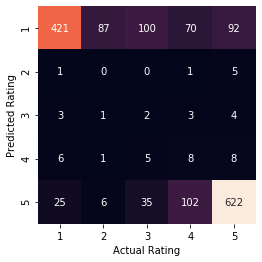

In [14]:
matrix = confusion_matrix(y_test, y_pred_nb_test)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Decision Tree

In [15]:
dtc = DecisionTreeClassifier()

dtc.fit(tfidf_X_train, y_train)

y_pred_dtc_test = dtc.predict(tfidf_X_test)

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_pred_dtc_test))
print("Test Precision Score:", metrics.precision_score(y_test, y_pred_dtc_test, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_pred_dtc_test, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_dtc_test, average = "weighted"))

Test Accuracy Score: 0.5628109452736318
Test Precision Score: 0.5228636444926456
Test Recall Score: 0.5628109452736318
Test F1 Score: 0.5391600664293943


Text(91.68, 0.5, 'Predicted Rating')

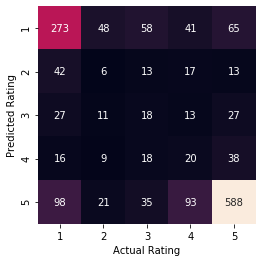

In [16]:
matrix = confusion_matrix(y_test, y_pred_dtc_test)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Random Forest

In [17]:
rfc = RandomForestClassifier()

rfc.fit(tfidf_X_train, y_train)

y_pred_rfc_test = rfc.predict(tfidf_X_test)

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_pred_rfc_test))
print("Test Precision Score:", metrics.precision_score(y_test, y_pred_rfc_test, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_pred_rfc_test, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_rfc_test, average = "weighted"))

Test Accuracy Score: 0.6480099502487562
Test Precision Score: 0.6098517818523889
Test Recall Score: 0.6480099502487562
Test F1 Score: 0.560390406631827


Text(91.68, 0.5, 'Predicted Rating')

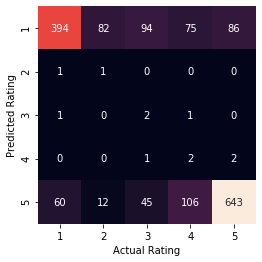

In [18]:
matrix = confusion_matrix(y_test, y_pred_rfc_test)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Support Vector Machine

In [19]:
SVM = svm.SVC()
SVM.fit(tfidf_X_train, y_train)

y_pred_SVM_test = SVM.predict(tfidf_X_test)

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_pred_SVM_test))
print("Test Precision Score:", metrics.precision_score(y_test, y_pred_SVM_test, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_pred_SVM_test, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_SVM_test, average = "weighted"))

Test Accuracy Score: 0.6685323383084577
Test Precision Score: 0.5906748506677536
Test Recall Score: 0.6685323383084577
Test F1 Score: 0.576083340899136


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'Predicted Rating')

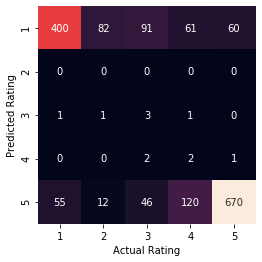

In [20]:
matrix = confusion_matrix(y_test, y_pred_SVM_test)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Gridsearch (Decision Tree)

In [21]:
dtc_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2, 3, 4, 5, 6],
    'max_features': ['auto', 'log2', None],
    'min_samples_split' : [2, 3, 4, 5, 10, 15],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 10]
}


In [22]:
starttime = datetime.now()

#######

dt_grid = GridSearchCV(dtc, dtc_param_grid, cv=5, return_train_score=True)

dt_grid.fit(tfidf_X_train, y_train)

#######

print(datetime.now() - starttime)

0:03:02.086427


In [23]:
dt_grid_trainscore = np.mean(dt_grid.cv_results_['mean_train_score'])

dt_grid_testscore = dt_grid.score(tfidf_X_train, y_train)

print(f"Mean Training Score: {dt_grid_trainscore : .2%}")
print(f"Mean Test Score: {dt_grid_testscore : .2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid.best_params_

Mean Training Score:  54.91%
Mean Test Score:  64.16%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [31]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features='auto', min_samples_leaf=3, min_samples_split=2, random_state=22)

dtc.fit(tfidf_X_train, y_train)

y_pred_dtc_test = dtc.predict(tfidf_X_test)

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_pred_dtc_test))
print("Test Precision Score:", metrics.precision_score(y_test, y_pred_dtc_test, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_pred_dtc_test, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_dtc_test, average = "weighted"))

Test Accuracy Score: 0.6001243781094527
Test Precision Score: 0.523811989672122
Test Recall Score: 0.6001243781094527
Test F1 Score: 0.532582711187204


Compare to:
- Test Accuracy Score: 0.5628109452736318
- Test Precision Score: 0.5228636444926456
- Test Recall Score: 0.5628109452736318
- Test F1 Score: 0.5391600664293943

## Gridsearch (Random Forest)

In [32]:
rf_param_grid = {
    'n_estimators' : [50, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2, 4, 6],
    'max_features': ['auto', 'log2', None],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [1, 3]
}

In [33]:
starttime = datetime.now()

#######

rf_grid = GridSearchCV(rfc, rf_param_grid, cv=5)

rf_grid.fit(tfidf_X_train, y_train)

#######

print(datetime.now() - starttime)

0:31:48.161977


In [34]:
print(f"Training Accuracy: {rf_grid.best_score_ : .2%}")
print("Best Parameter Combination Found During Grid Search:")
rf_grid.best_params_

Training Accuracy:  67.43%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [35]:
rfc = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=10, random_state = 11, n_jobs=-1)

rfc.fit(tfidf_X_train, y_train)

y_pred_rfc_test = rfc.predict(tfidf_X_test)

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_pred_rfc_test))
print("Test Precision Score:", metrics.precision_score(y_test, y_pred_rfc_test, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_pred_rfc_test, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_rfc_test, average = "weighted"))

Test Accuracy Score: 0.6560945273631841
Test Precision Score: 0.6569224283121898
Test Recall Score: 0.6560945273631841
Test F1 Score: 0.5653420462507637


Compare to:
- Test Accuracy Score: 0.6480099502487562
- Test Precision Score: 0.6098517818523889
- Test Recall Score: 0.6480099502487562
- Test F1 Score: 0.560390406631827

## Gridsearch (Support Vector Machine)

In [36]:
svm_param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf', 'linear', 'nonlinear', 'sigmoid', 'polynomial']
}

In [37]:
starttime = datetime.now()

#######

svm_grid = GridSearchCV(SVM, svm_param_grid, refit=True, verbose=3)

svm_grid.fit(tfidf_X_train, y_train)

#######

print(datetime.now() - starttime)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.498, total=   2.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.503, total=   3.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.502, total=   2.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.501, total=   2.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.509, total=   2.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.662, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.658, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.655, total=   2.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.669, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 285, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'nonlinear' is not in list

  FitFailedWarning)


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.658, total=   2.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.653, total=   2.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.652, total=   2.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.662, total=   2.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.647, total=   2.2s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] ..... C=0.1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] ..... C=0.1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 285, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'polynomial' is not in list

  FitFailedWarning)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.484, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.484, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.483, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.483, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.483, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.662, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.658, total=   2.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.669, total=   2.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.654, total=   2.1s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.683, total=   2.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.703, total=   1.9s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.685, total=   1.9s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.678, total=   1.9s
[CV] C=1, gamma=1, kernel=polynomial .................................
[CV] ....... C=1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=1, gamma=1, kernel=polynomial .................................
[CV] ....... C=1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=1, gamma=1, kernel=polynomial .................................
[CV] ....... C=1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=1, gamma=1, kernel=polynomial .................................
[CV] .

[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.484, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.484, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.483, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.483, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.483, total=   2.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.691, total=   2.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.686, total=   2.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .

[CV] ........ C=10, gamma=1, kernel=linear, score=0.657, total=   2.2s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.650, total=   2.3s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .

[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.658, total=   2.3s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.655, total=   2.3s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.669, total=   2.3s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.654, total=   2.3s
[CV] C=10, gamma=0.01, kernel=polynomial .............................
[CV] ... C=10, gamma=0.01, kernel=polynomial, score=nan, total=   0.0s
[CV] C=10, gamma=0.01, kernel=polynomial .............................
[CV] ... C=10, gamma=0.01, kernel=polynomial, score=nan, total=   0.0s
[CV] C=10, gamma=0.01, kernel=polynomial .............................
[CV] ... C=10, gamma=0.01, kernel=polynomial, score=nan, total=   0.0s
[CV] C=10, gamma=0.01, kernel=polynomial .............................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.681, total=   3.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.676, total=   3.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.692, total=   3.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.682, total=   3.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.686, total=   3.2s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.615, total=   2.2s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.621, total=   2.2s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.628, total=   2.2s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.627, total=   2.3s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.484, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.483, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.483, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.483, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=polynomial ..........................
[CV]  C=100, gamma=0.0001, kernel=polynomial, score=nan, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=polynomial ..........................
[CV]  C=100, gamma=0.0001, kernel=polynomial, score=nan, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=polynomial ..........................
[CV]  C=100, gamma=0.0001, kernel=polynomial, score=nan, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=polynomial ..........................
[CV]  

[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.622, total=   2.4s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.637, total=   2.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.635, total=   2.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.650, total=   2.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.652, total=   2.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.602, total=   2.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.613, total=   2.8s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] .

[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.603, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.619, total=   2.3s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  

[Parallel(n_jobs=1)]: Done 625 out of 625 | elapsed: 14.2min finished


0:14:14.655374


In [38]:
print(svm_grid.best_params_)
print(svm_grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [39]:
SVM = svm.SVC(C=1, gamma=1, kernel='linear')
SVM.fit(tfidf_X_train, y_train)

y_pred_SVM_test = SVM.predict(tfidf_X_test)

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_pred_SVM_test))
print("Test Precision Score:", metrics.precision_score(y_test, y_pred_SVM_test, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_pred_SVM_test, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_SVM_test, average = "weighted"))

Test Accuracy Score: 0.6728855721393034
Test Precision Score: 0.5796878109452736
Test Recall Score: 0.6728855721393034
Test F1 Score: 0.5961049438901596


Compared to:
- Test Accuracy Score: 0.6685323383084577
- Test Precision Score: 0.5906748506677536
- Test Recall Score: 0.6685323383084577
- Test F1 Score: 0.576083340899136